In [6]:
import pandas as pd
import numpy as np

#Data Visulation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

import statsmodels.api as sm

from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
data = pd.read_csv("/content/NetflixOriginals.csv",encoding = "ISO-8859-1")
dataDate = data.copy()
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [10]:
data.isnull().values.any()

False

In [11]:
data.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [12]:
dataDate["Premiere"] = dataDate["Premiere"].apply(lambda x: "".join(x for x in x.replace(".",",")))
dataDate["PremiereDate"] = dataDate["Premiere"].apply(lambda x: datetime.strptime(x, "%B %d, %Y").date())
dataDate["Year"] = dataDate["Premiere"].apply(lambda x: "".join(x for x in x.replace(",","").split()[-1]))

#Convert object to date
dataDate["PremiereDate"] = pd.to_datetime(dataDate["PremiereDate"])
dataDate

,Title,Genre,Premiere,Runtime,IMDB Score,Language,PremiereDate,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09,2015
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08,2020


In [13]:
dataDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         584 non-null    object        
 1   Genre         584 non-null    object        
 2   Premiere      584 non-null    object        
 3   Runtime       584 non-null    int64         
 4   IMDB Score    584 non-null    float64       
 5   Language      584 non-null    object        
 6   PremiereDate  584 non-null    datetime64[ns]
 7   Year          584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.6+ KB


In [14]:
data[data["Runtime"]>=120]["Language"].value_counts()

English                 48
Hindi                   11
Korean                   3
Japanese                 2
Marathi                  2
Spanish                  2
English/Japanese         1
Indonesian               1
Khmer/English/French     1
Portuguese               1
English/Korean           1
English/Akan             1
Name: Language, dtype: int64

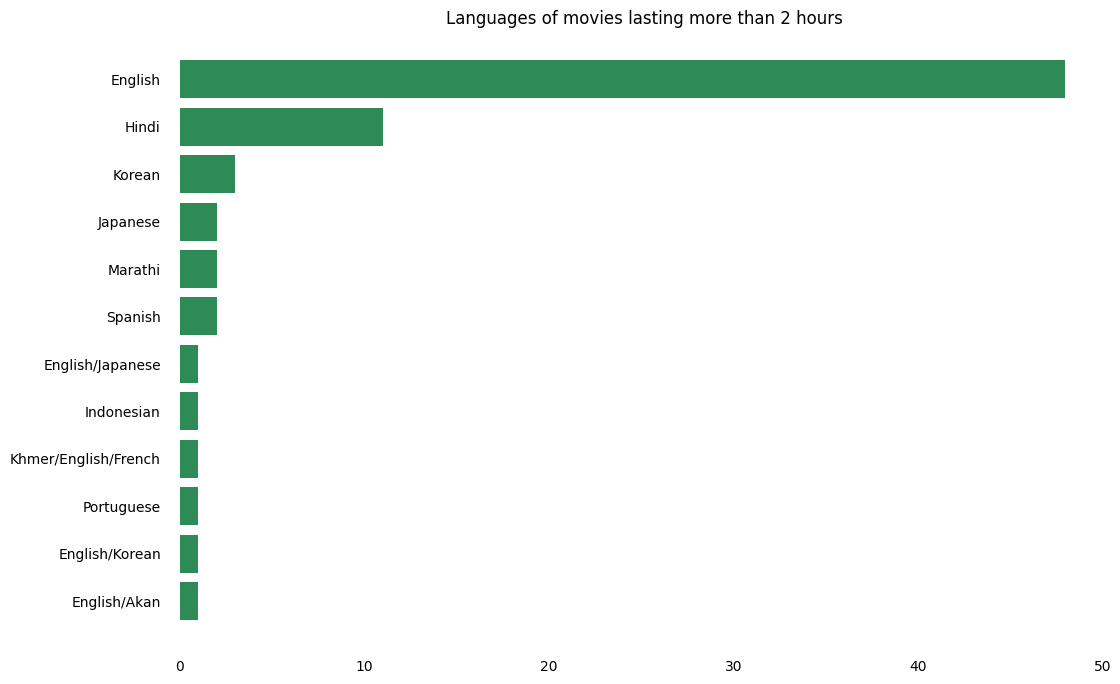

In [20]:
# Bar Chart
fig, ax = plt.subplots(figsize =(12, 8))

ax.barh(data[data["Runtime"]>=120]["Language"].value_counts().index,
        data[data["Runtime"]>=120]["Language"].value_counts().values,
        color= "seagreen")

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


# Remove grid lines
ax.grid(False)


# Show top values
ax.invert_yaxis()
# Add Plot Title
ax.set_title('Languages of movies lasting more than 2 hours',
             loc ='center')
plt.show()

In [21]:
# Pie Chart
fig = go.Figure(data=[go.Pie(labels=data[data["Runtime"]>=120]["Language"].value_counts().index,
                             values=data[data["Runtime"]>=120]["Language"].value_counts().values, hole=.5)])
fig.update_layout(
    title="Languages of movies lasting more than 2 hours",
    title_x=0.5,
    legend_title="Languages",
    font=dict(
        family="Lucida Grande",
        size=15,
        color="sienna"
    ))
fig.show()


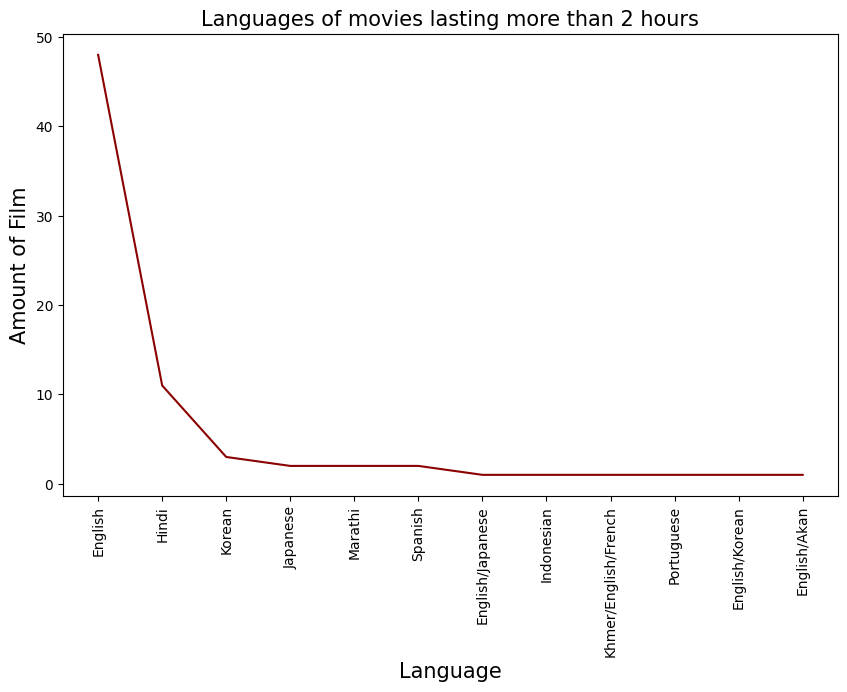

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'data' with your DataFrame containing the movie data
# Make sure you have imported the necessary libraries and loaded your data

# Filter the data for movies with a runtime of 120 minutes or more
filtered_data = data[data["Runtime"] >= 120]

# Create a line chart using Seaborn
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x=filtered_data["Language"].value_counts().index,
             y=filtered_data["Language"].value_counts().values,
             ax=ax,
             color="darkred")

# Rotate x-axis labels for better readability
for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.title("Languages of movies lasting more than 2 hours", fontsize=15)
plt.xlabel("Language", fontsize=15)
plt.ylabel("Amount of Film", fontsize=15)
plt.show()


In [24]:
dataSortMaxRuntime = data.groupby("Language").agg({"Runtime":"max"}).sort_values(by="Runtime", ascending=False).reset_index()
dataSortMaxRuntime[0:5]

,Language,Runtime
0,English,209
1,Japanese,151
2,Hindi,149
3,Spanish,139
4,English/Akan,136


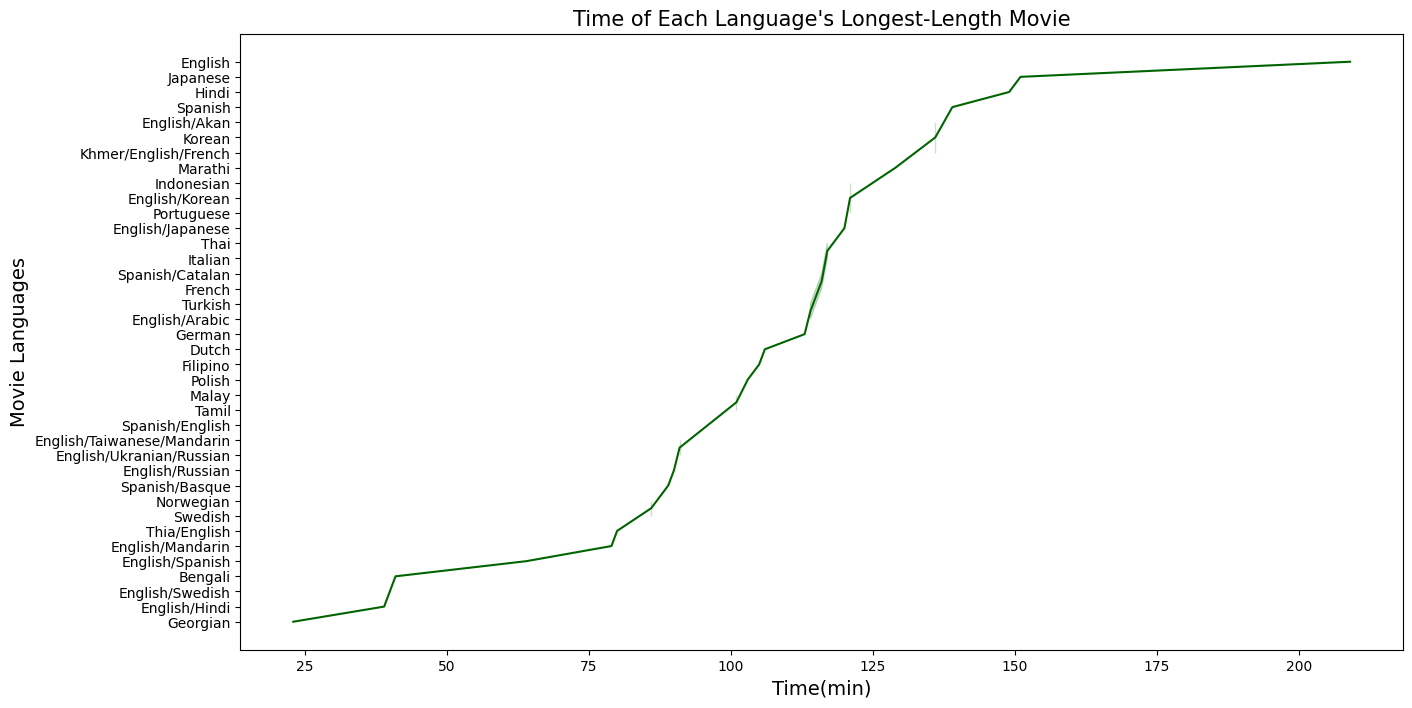

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=dataSortMaxRuntime,x="Runtime",y="Language",ax=ax,color="darkgreen")

plt.title("Time of Each Language's Longest-Length Movie",fontsize=15)
plt.xlabel("Time(min)",fontsize=14)
plt.ylabel("Movie Languages",fontsize=14)
plt.show()

In [26]:
start_date = '2019-01-01'
end_date = '2020-06-01'
#Date Control
dataDateControl = dataDate[(dataDate.PremiereDate.between(start_date, end_date))]
#Genre Control
dataDateControlGenre = dataDateControl[dataDateControl.Genre == "Documentary"]
dataDateControlGenre.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,PremiereDate,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019
15,After the Raid,Documentary,"December 19, 2019",25,4.3,Spanish,2019-12-19,2019
20,"Hello Privilege. It's Me, Chelsea",Documentary,"September 13, 2019",64,4.4,English,2019-09-13,2019
30,After Maria,Documentary,"May 24, 2019",37,4.6,English/Spanish,2019-05-24,2019
111,Ghosts of Sugar Land,Documentary,"October 16, 2019",21,5.5,English,2019-10-16,2019
263,A Tale of Two Kitchens,Documentary,"May 22, 2019",30,6.3,English/Spanish,2019-05-22,2019
286,The Legend of Cocaine Island,Documentary,"March 29, 2019",87,6.3,English,2019-03-29,2019
290,Travis Scott: Look Mom I Can Fly,Documentary,"August 28, 2019",85,6.3,English,2019-08-28,2019
295,Birders,Documentary,"September 25, 2019",37,6.4,English/Spanish,2019-09-25,2019
303,Murder to Mercy: The Cyntoia Brown Story,Documentary,"April 29, 2020",97,6.4,English,2020-04-29,2020


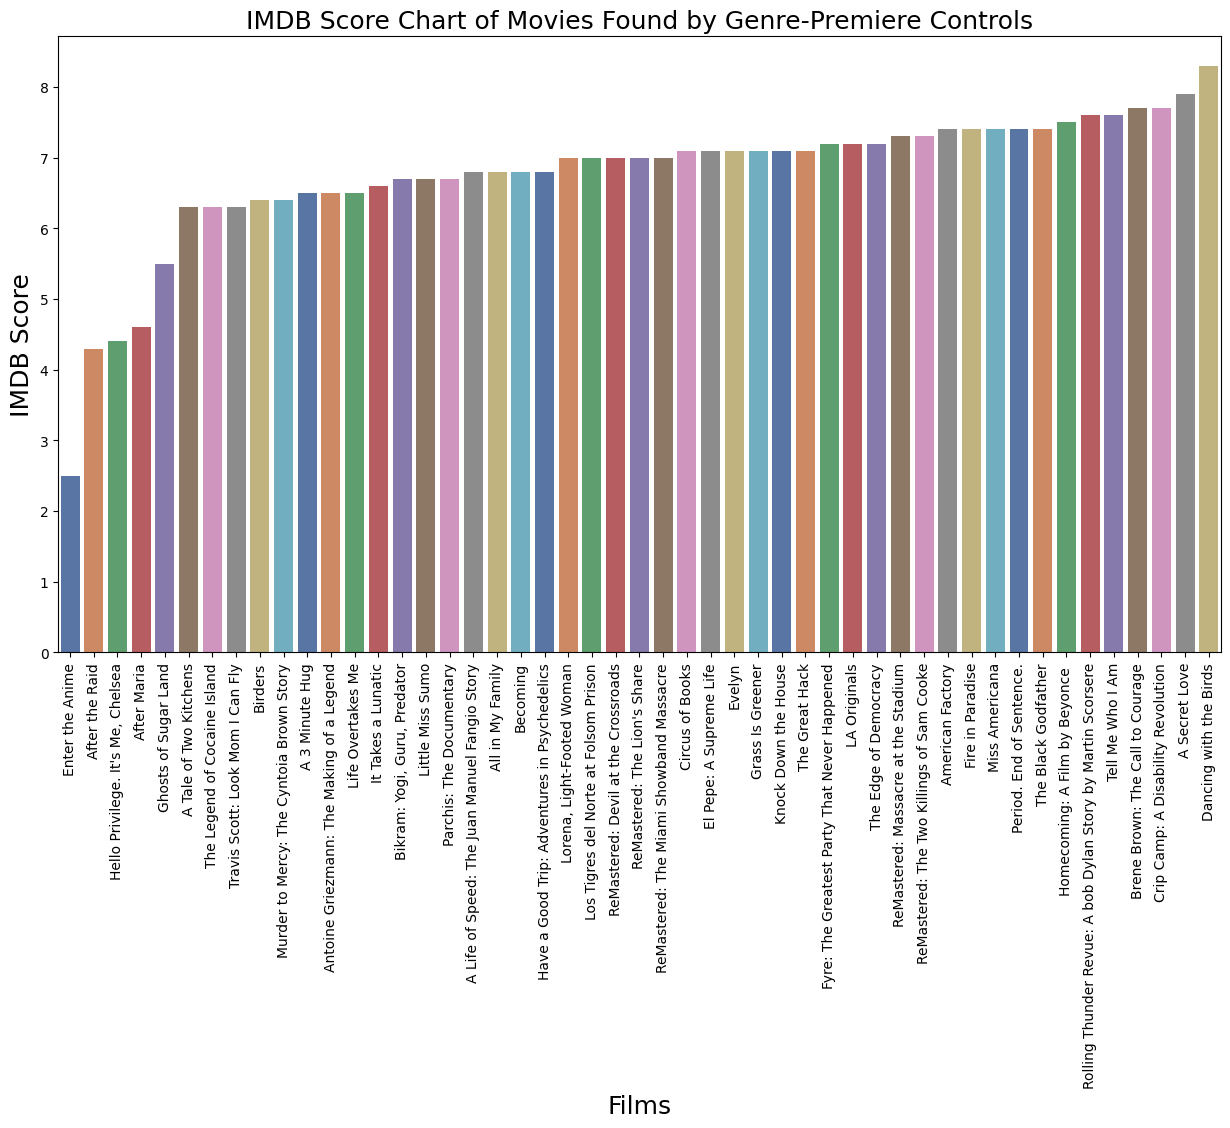

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
rotation = sns.barplot(data = dataDateControlGenre ,
                       x="Title",
                       y="IMDB Score",
                       ax=ax,
                       palette="deep")
for item in rotation.get_xticklabels():
    item.set_rotation(90)

plt.title("IMDB Score Chart of Movies Found by Genre-Premiere Controls", fontsize=18)
plt.xlabel("Films", fontsize=18)
plt.ylabel("IMDB Score", fontsize=18)
plt.show()

In [28]:
lowestImdbIndex = data[data["Language"] == 'English']["IMDB Score"].idxmin()
highestImdbIndex = data[data["Language"] == 'English']["IMDB Score"].idxmax()

In [29]:
# Movie with the lowest IMDB rating in English
data.iloc[lowestImdbIndex:lowestImdbIndex+1,]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English


In [30]:
# Highest IMDB rated movie in English
data.iloc[highestImdbIndex:highestImdbIndex+1,]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [32]:
highestIMDB = list(data.iloc[highestImdbIndex:highestImdbIndex+1,]["IMDB Score"])[-1]
highestIMDBGenre = list(data.iloc[highestImdbIndex:highestImdbIndex+1,]["Genre"])[-1]
highestIMDBTitle = list(data.iloc[highestImdbIndex:highestImdbIndex+1,]["Title"])[-1]

lowestIMDB = list(data.iloc[lowestImdbIndex:lowestImdbIndex+1,]["IMDB Score"])[-1]
lowestIMDBGenre = list(data.iloc[lowestImdbIndex:lowestImdbIndex+1,]["Genre"])[-1]
lowestIMDBTitle = list(data.iloc[lowestImdbIndex:lowestImdbIndex+1,]["Title"])[-1]


print("""The name of the English movie with the highest IMDB rating({}): '{}', Genre: {}.'""".format(highestIMDB,highestIMDBTitle,highestIMDBGenre))
print("""The name of the English movie with the lowest IMDB rating({}): '{}', Genre: {}.'""".format(lowestIMDB,lowestIMDBTitle,lowestIMDBGenre))


The name of the English movie with the highest IMDB rating(9.0): 'David Attenborough: A Life on Our Planet', Genre: Documentary.'
The name of the English movie with the lowest IMDB rating(3.2): 'The Open House', Genre: Horror thriller.'


In [34]:
print("Average length of movies shot in Hindi : {} dk'dır.".format(data[data["Language"] == "Hindi"]["Runtime"].mean()))

Average length of movies shot in Hindi : 115.78787878787878 dk'dır.


In [35]:
print(f"There are {data['Genre'].value_counts().count()} categories in the Genre feature ")

There are 115 categories in the Genre feature 


In [36]:
dataGenre = pd.DataFrame(columns = ["Title" , 'Count'])
dataGenre["Title"] = data["Genre"].value_counts().index
dataGenre["Count"] = data["Genre"].value_counts().values

fig = px.bar(dataGenre, x="Count", y="Title", orientation='h', width=1000, height=1000,color = "Title")
fig.show()

fig = px.pie(dataGenre[0:15], values='Count', names='Title'
             ,title='15 most used categories'
             ,color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

The 3 most used languages in the dataset and their quantities
Language: English, Quantity: 401
Language: Hindi, Quantity: 33
Language: Spanish, Quantity: 31


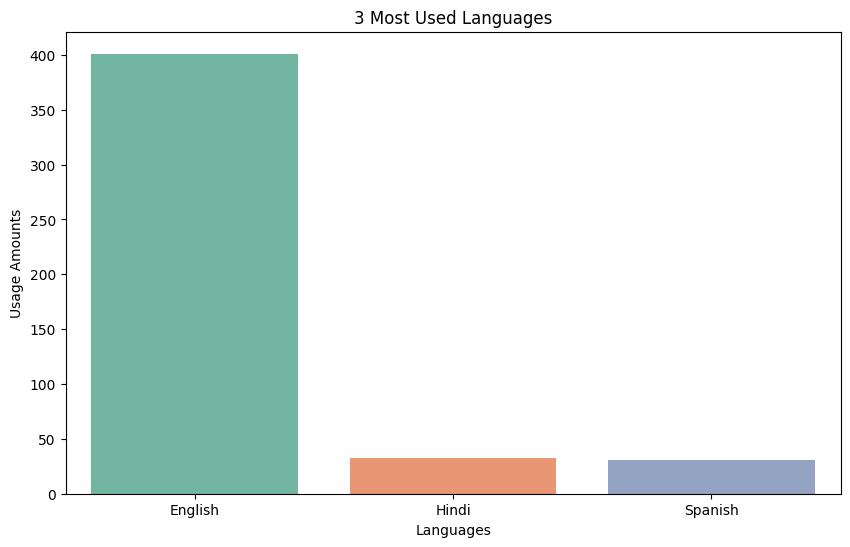

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 3 most used languages and their quantities
top_languages = data["Language"].value_counts()[:3]
print("The 3 most used languages in the dataset and their quantities")
for i in range(3):
    language = top_languages.index[i]
    quantity = top_languages.values[i]
    print(f"Language: {language}, Quantity: {quantity}")

# Create a bar plot for the top 3 most used languages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values, palette="Set2")
plt.title("3 Most Used Languages")
plt.xlabel("Languages")
plt.ylabel("Usage Amounts")
plt.show()


In [42]:
dataIMBD = data.nlargest(n=10, columns=['IMDB Score']).iloc[:,[0,1,4]]
dataIMBD

,Title,Genre,IMDB Score
583,David Attenborough: A Life on Our Planet,Documentary,9.0
582,Emicida: AmarElo - It's All For Yesterday,Documentary,8.6
581,Springsteen on Broadway,One-man show,8.5
578,Ben Platt: Live from Radio City Music Hall,Concert Film,8.4
579,Taylor Swift: Reputation Stadium Tour,Concert Film,8.4
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,8.4
576,Cuba and the Cameraman,Documentary,8.3
577,Dancing with the Birds,Documentary,8.3
571,13th,Documentary,8.2
572,Disclosure: Trans Lives on Screen,Documentary,8.2


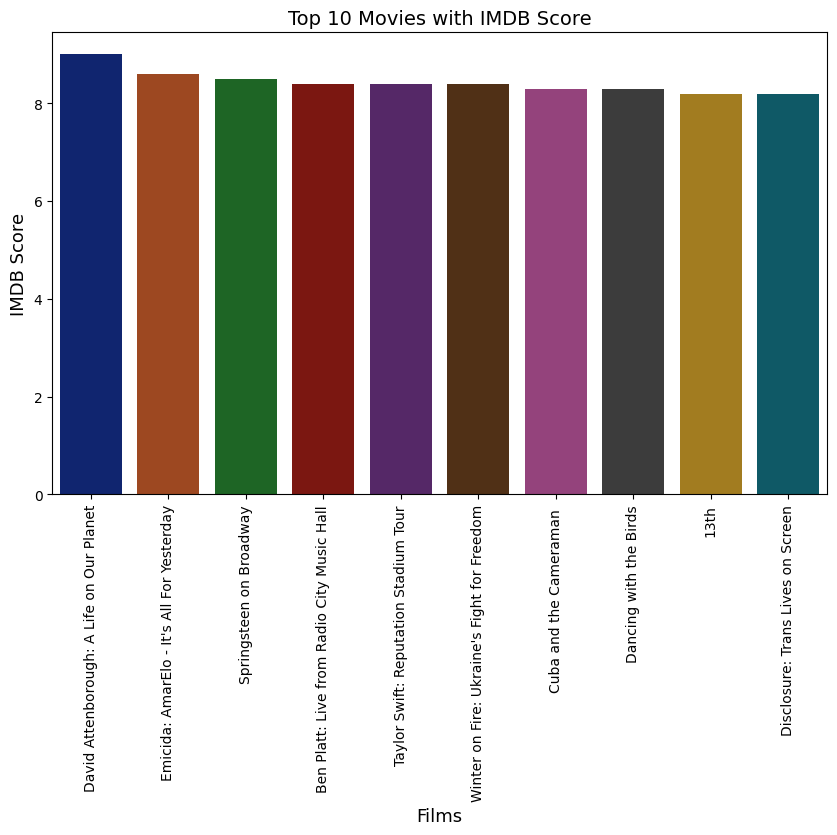

In [43]:
# Bar Chart
fig, ax = plt.subplots(figsize=(10,6))
rotation = sns.barplot(data = dataIMBD ,
                       x="Title",
                       y="IMDB Score",
                       ax=ax,
                       palette="dark")
for item in rotation.get_xticklabels():
    item.set_rotation(90)

plt.title("Top 10 Movies with IMDB Score", fontsize=14)
plt.xlabel("Films", fontsize=13)
plt.ylabel("IMDB Score", fontsize=13)
plt.show()

# Scatter Chart
fig = px.scatter(data_frame = dataIMBD ,
                 x="Title",
                 y="IMDB Score",
                 color= 'Genre',
                 symbol='Genre',
                 title = 'Top 10 Movies with IMDB Score',
                 template='ggplot2')
fig.show()

             Runtime  IMDB Score
Runtime     1.000000   -0.040896
IMDB Score -0.040896    1.000000 



<Figure size 1200x1000 with 0 Axes>

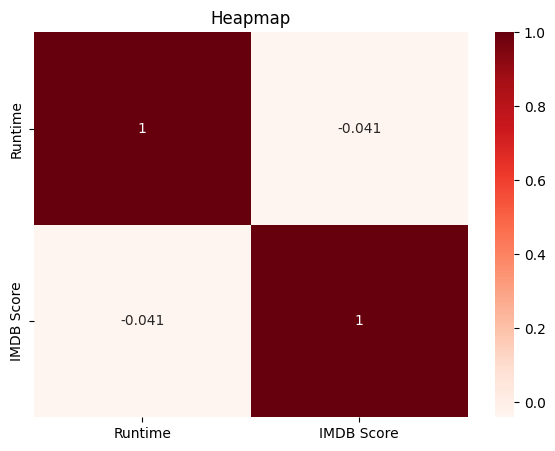

In [44]:
#Using Pearson Correlation
cor = data.corr()
print(cor,"\n")

#Correlation Heatmap
plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,ax=ax)
plt.title("Heapmap")
plt.show()

In [45]:
dataIMDBGenre = data.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()
dataIMDBGenre

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


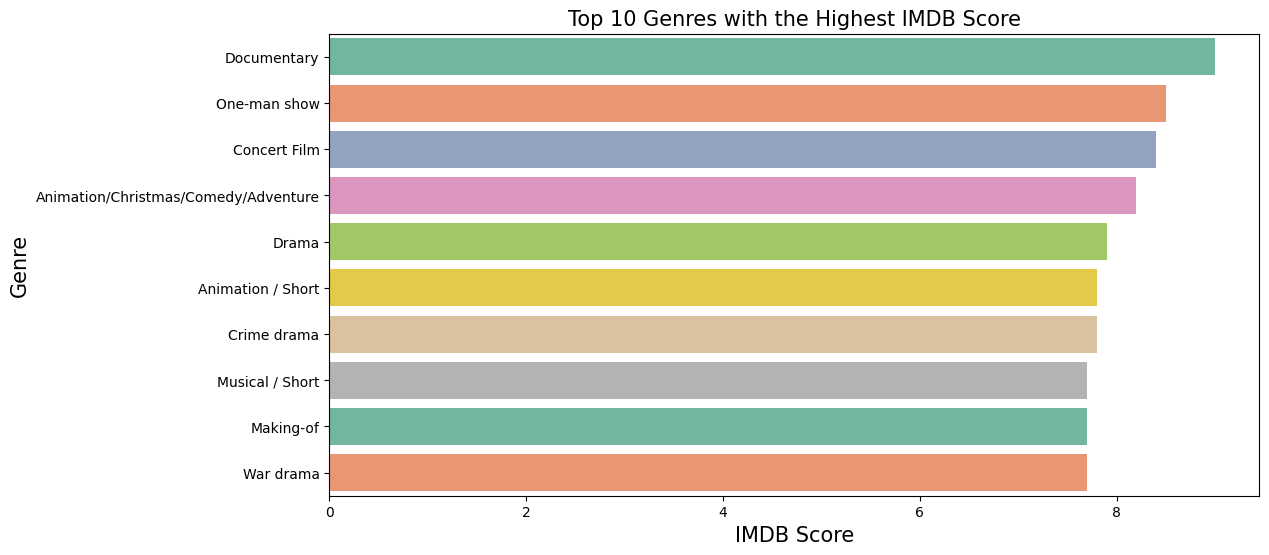

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'dataIMDBGenre' with the actual DataFrame containing your data
# Make sure you have imported the necessary libraries and loaded your data

# Create a bar chart using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="IMDB Score", y="Genre", data=dataIMDBGenre, palette="Set2", ax=ax)

fontdict = dict(family="DejaVu Sans", size=15, color="black")
plt.title("Top 10 Genres with the Highest IMDB Score", fontdict=fontdict)
plt.xlabel("IMDB Score", fontdict=fontdict)
plt.ylabel("Genre", fontdict=fontdict)
plt.show()


In [48]:
dataRuntime = data.nlargest(n=10, columns=['Runtime']).iloc[:,[0,3]]
dataRuntime

,Title,Runtime
561,The Irishman,209
328,Da 5 Bloods,155
581,Springsteen on Broadway,153
247,Citation,151
284,The Forest of Love,151
7,The Last Days of American Crime,149
509,Raat Akeli Hai,149
543,Ludo,149
194,Army of the Dead,148
5,Drive,147


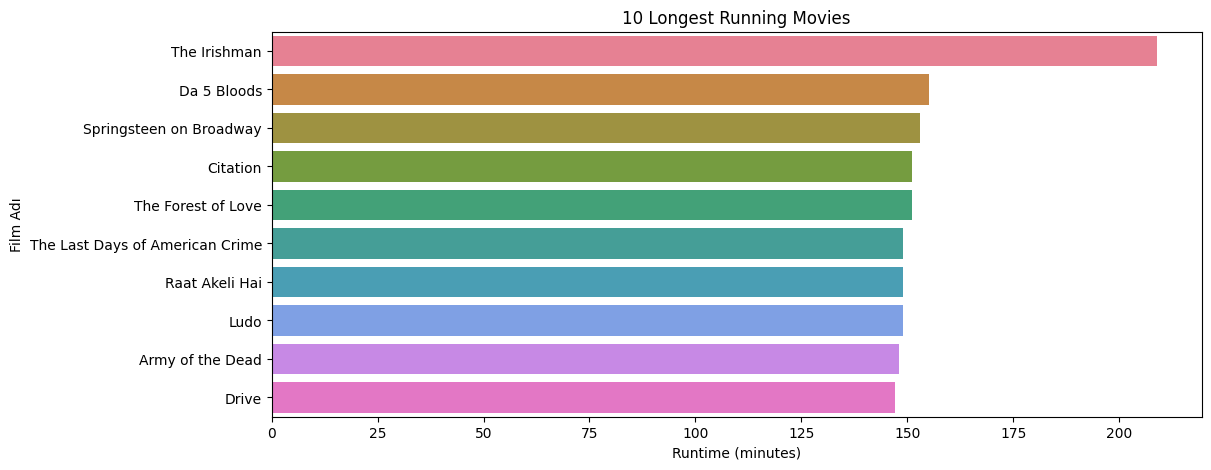

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'dataRuntime' with the actual DataFrame containing your data
# Make sure you have imported the necessary libraries and loaded your data

# Create a bar chart using Seaborn
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="Runtime", y="Title", data=dataRuntime, palette="husl", ax=ax)
plt.title("10 Longest Running Movies")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Film Adı")
plt.show()


In [51]:
print("The most movies were released in {}.\nNumber of Films Released: {}".format(dataDate["Year"].value_counts().idxmax(),dataDate["Year"].value_counts().max()))

dataFilmPie = pd.DataFrame(columns = ["Film" , 'Year'])
dataFilmPie["Film"] = dataDate["Year"].value_counts().values
dataFilmPie["Year"] = dataDate["Year"].value_counts().index

# Pie Chart
fig = px.pie(dataFilmPie, values='Film', names='Year', color_discrete_sequence=px.colors.sequential.RdBu,
             title="Total Film Amounts by Years")
fig.show()

The most movies were released in 2020.
Number of Films Released: 183


In [52]:
dataLanguageMeanIMDB = pd.DataFrame(columns=["Language","Mean IMDB Score"])
dataLanguageMeanIMDB["Language"] = data.groupby("Language").mean()["IMDB Score"].index
dataLanguageMeanIMDB["Mean IMDB Score"] = data.groupby("Language").mean()["IMDB Score"].values
dataLanguageMeanIMDB.head()

,Language,Mean IMDB Score
0,Bengali,7.10000
1,Dutch,5.80000
2,English,6.38005
3,English/Akan,7.70000
4,English/Arabic,7.30000


Among the languages, the country with the lowest IMDB Score(4.2) is Malay.



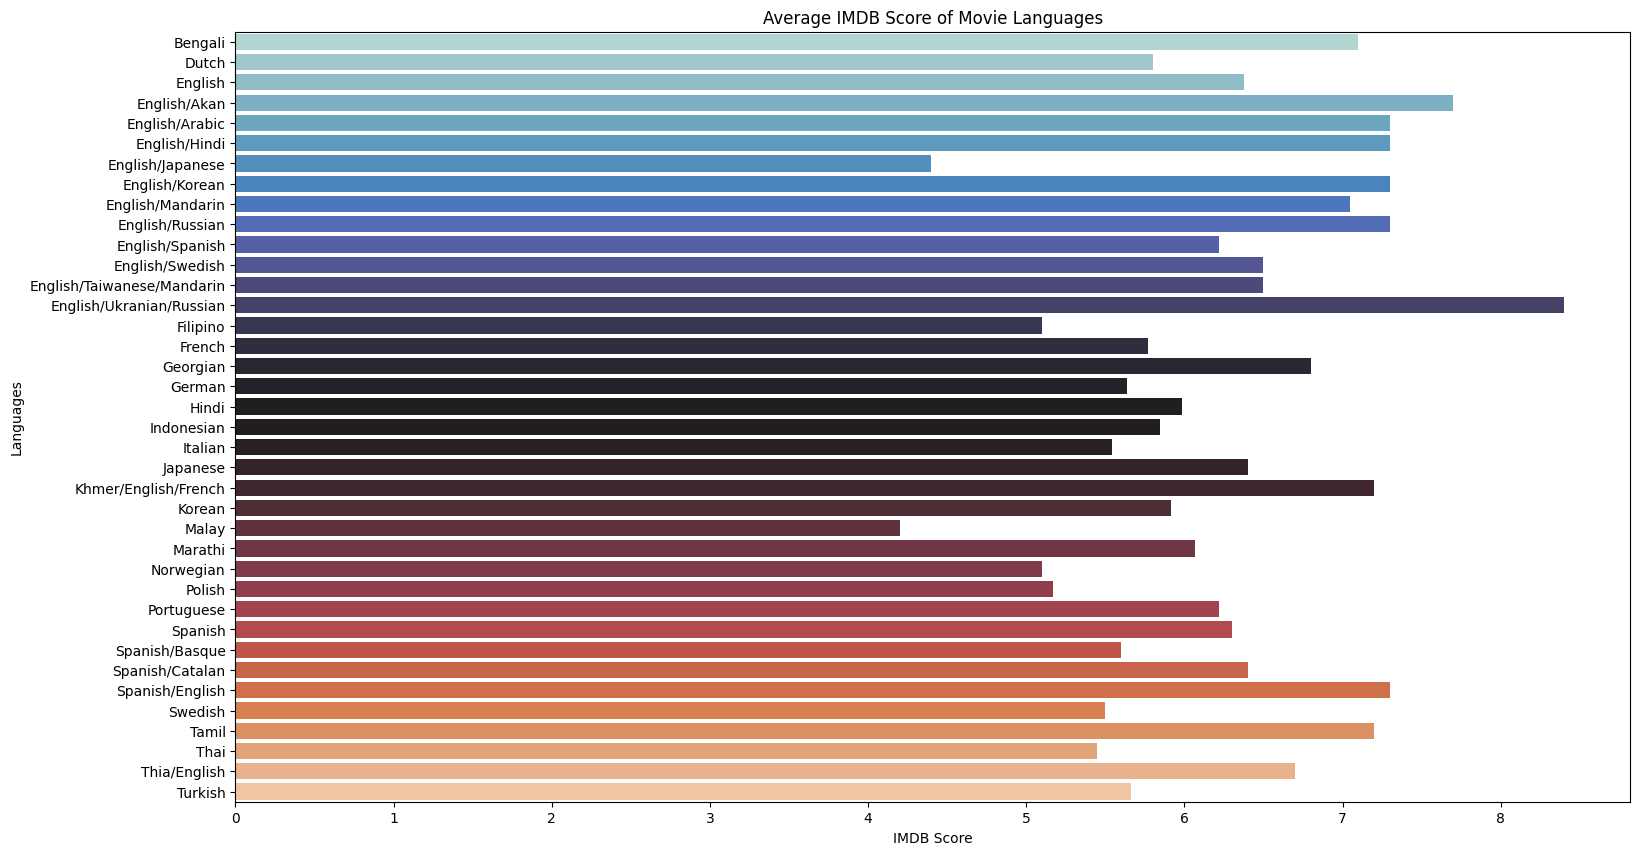

In [53]:
valueMeanIMDB = dataLanguageMeanIMDB["Mean IMDB Score"].min()
indexMeanIMDB = dataLanguageMeanIMDB["Mean IMDB Score"].idxmin()
textMeanIMDB = list(dataLanguageMeanIMDB.iloc[indexMeanIMDB:indexMeanIMDB+1,]["Language"])[-1]
print(f"Among the languages, the country with the lowest IMDB Score({valueMeanIMDB}) is {textMeanIMDB}.\n")

# Bar Chart
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(data=dataLanguageMeanIMDB,
            x="Mean IMDB Score",
            y="Language",
            palette = "icefire",
            ax=ax);
plt.title("Average IMDB Score of Movie Languages")
plt.ylabel("Languages")
plt.xlabel("IMDB Score")
plt.show()

In [54]:
dataDateRuntime = dataDate[["Runtime","Year"]].groupby("Year").sum()
dataDateRuntime

,Runtime
Year,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


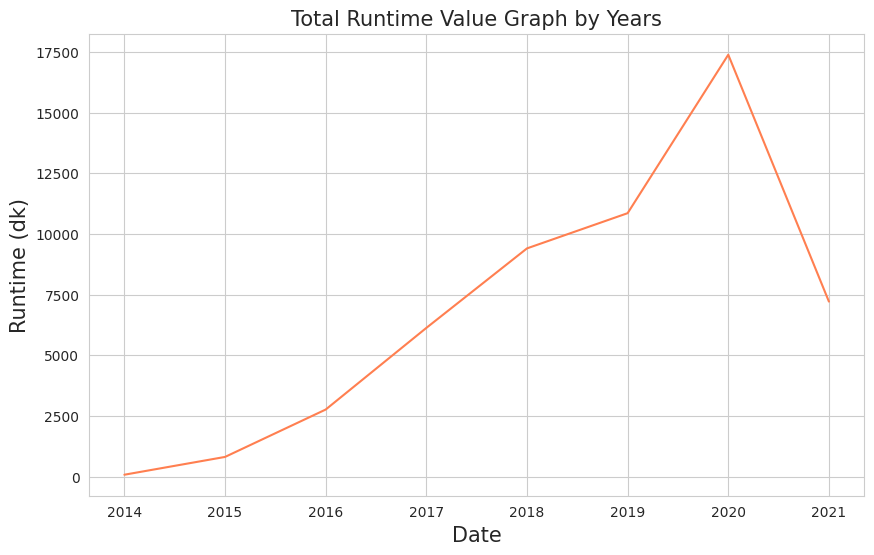

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'dataDateRuntime' with the actual DataFrame containing your data
# Make sure you have imported the necessary libraries and loaded your data

# Create a line chart using Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(x=dataDateRuntime.index, y=dataDateRuntime["Runtime"].values, color="coral", ax=ax)

plt.title("Total Runtime Value Graph by Years", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Runtime (dk)", fontsize=15)
plt.show()


In [57]:
data.groupby(["Language"])["Genre"].value_counts().groupby(level=0).head(1).sort_values(ascending=False)

Language                    Genre                
English                     Documentary              120
Hindi                       Drama                     13
Spanish                     Documentary                8
French                      Documentary                6
Portuguese                  Comedy                     6
English/Spanish             Documentary                5
Italian                     Drama                      4
Indonesian                  Drama                      3
Marathi                     Drama                      2
Korean                      Drama                      2
Japanese                    Anime/Science fiction      2
Turkish                     Comedy                     2
English/Hindi               Documentary                2
English/Mandarin            Documentary                2
Norwegian                   Horror                     1
Thia/English                Documentary                1
Thai                        Documentar

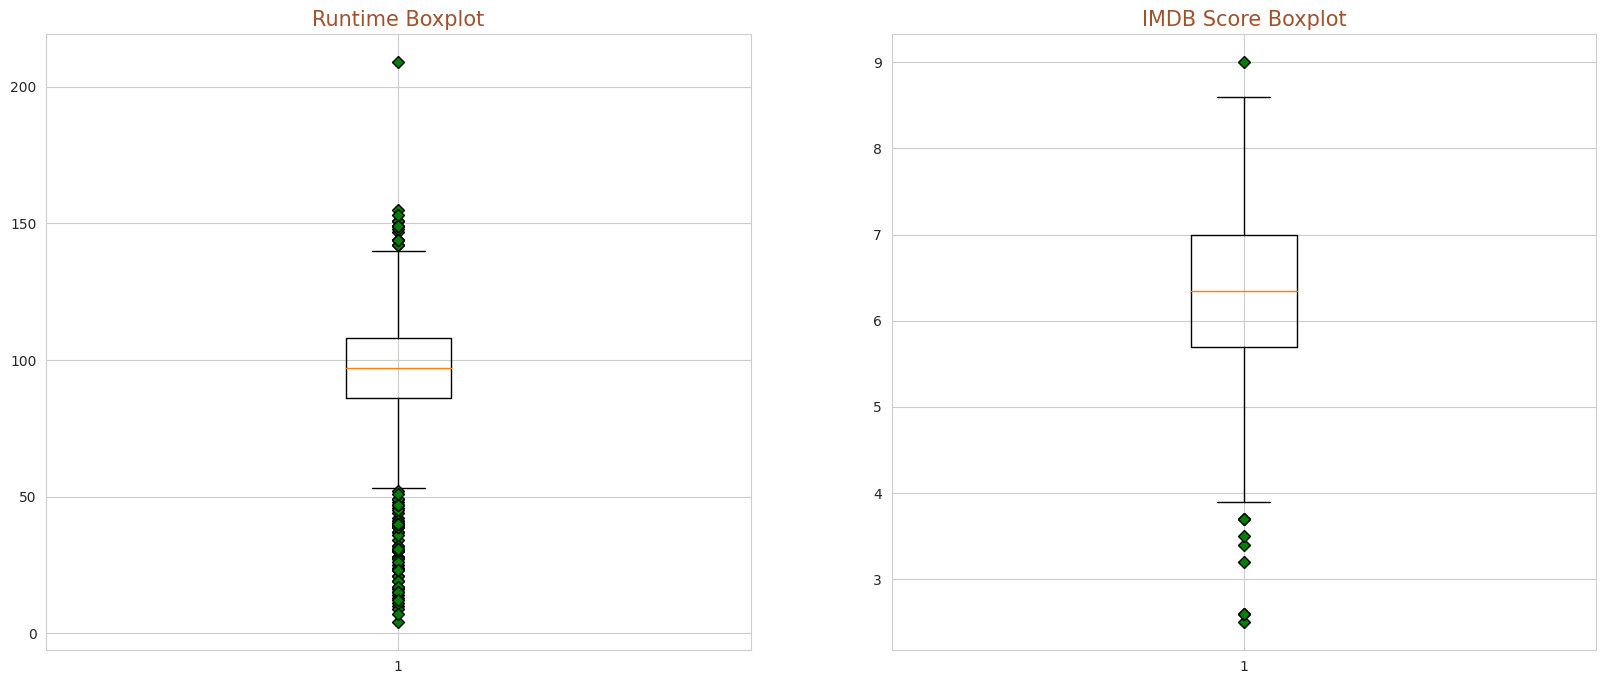

In [58]:
# Box Plot
green_diamond = dict(markerfacecolor='g', marker='D')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

ax1.boxplot(data["Runtime"],flierprops=green_diamond)
ax1.set_title("Runtime Boxplot",
              fontdict=dict(
                family="DejaVu Sans",
                size=15,
                color="sienna"))

ax2.boxplot(data["IMDB Score"],flierprops=green_diamond)
ax2.set_title("IMDB Score Boxplot",
              fontdict=dict(
                family="DejaVu Sans",
                size=15,
                color="sienna"))

plt.show();

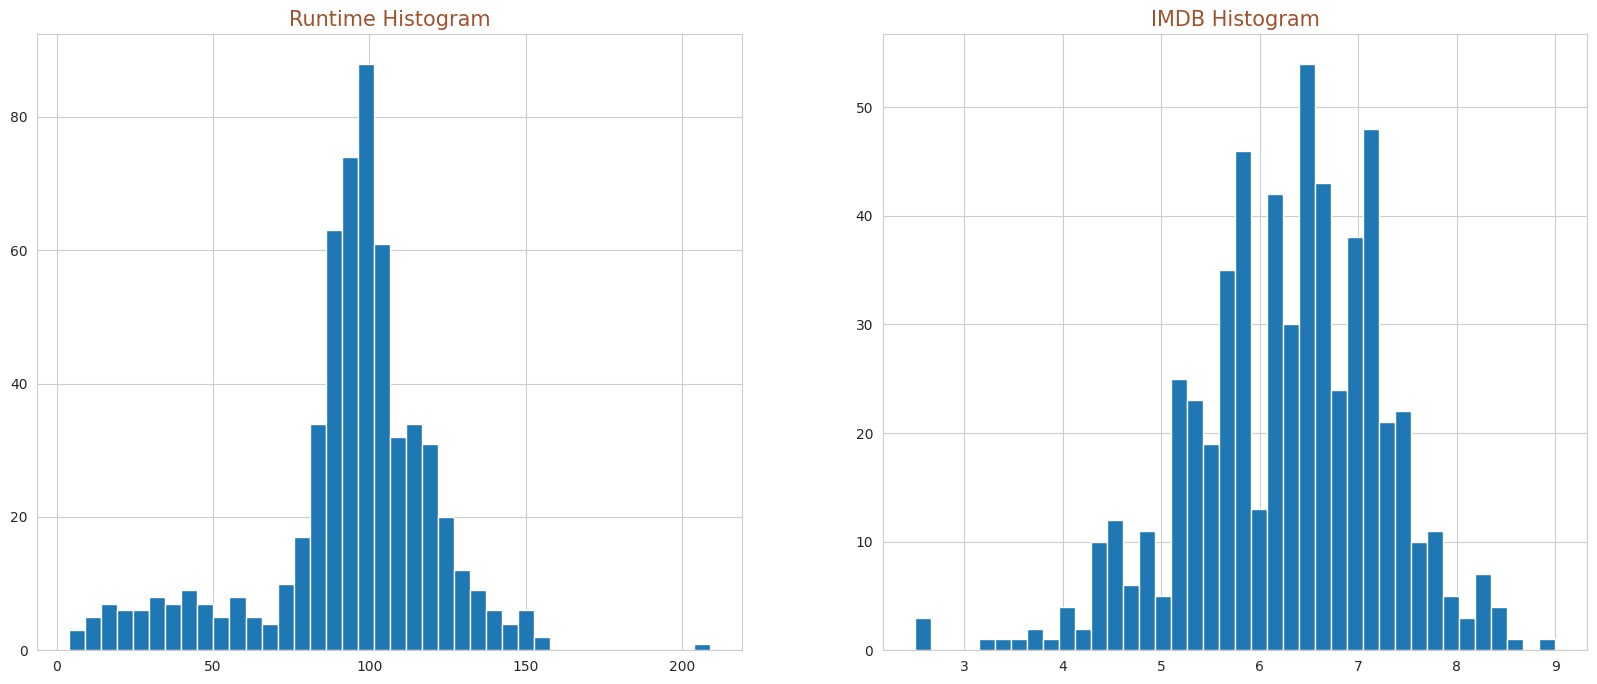

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

ax1.hist(data["Runtime"],bins=40)
ax1.set_title("Runtime Histogram",
              fontdict=dict(
                family="DejaVu Sans",
                size=15,
                color="sienna"))

ax2.hist(data["IMDB Score"],bins=40)
ax2.set_title("IMDB Histogram",
              fontdict=dict(
                family="DejaVu Sans",
                size=15,
                color="sienna"))

plt.show();

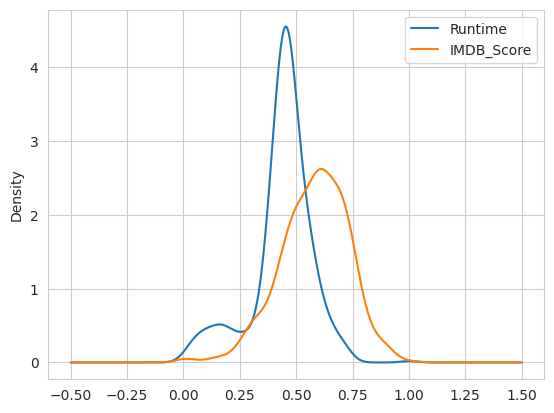

In [60]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newData = data.select_dtypes(include=numerics)
newData=newData.rename(columns = {'IMDB Score':'IMDB_Score'})

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normal = normalize(newData)
normal.plot.kde();

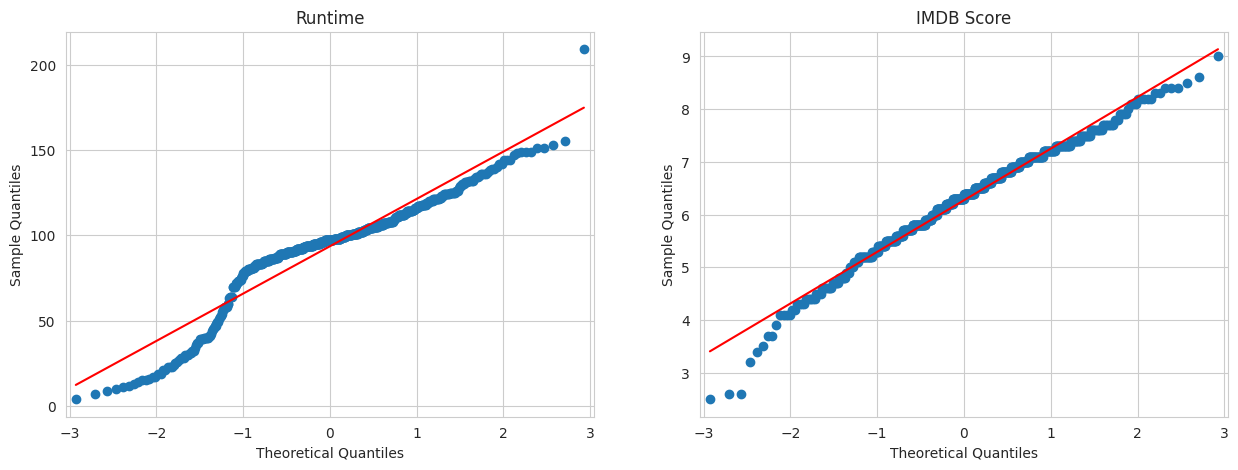

In [64]:
# qqplot
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(15, 5))

sm.qqplot(newData.Runtime, line = "s", ax = ax)
ax.set_title("Runtime")

sm.qqplot(newData.IMDB_Score, line = "s", ax = ax2)
ax2.set_title("IMDB Score")

plt.show()

In [62]:
def iqr(df,degisken):
    q1 = np.quantile(df[degisken], 0.25)
    q3 = np.quantile(df[degisken], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    return df[(df[degisken] < lower_t) | (df[degisken] > upper_t)]

Runtime_out = iqr(newData, "Runtime")
IMDB_Score_out = iqr(newData, "IMDB_Score")
print(f"""Amount of Outliers Found in Runtime Variable: {len(Runtime_out)}
Amount of Outliers Found in IMDB_Score Variable: {len(IMDB_Score_out)}""")

Amount of Outliers Found in Runtime Variable: 75
Amount of Outliers Found in IMDB_Score Variable: 9


In [63]:
def double_mad(df, degisken):
    c = 1.4826
    q2 = np.median(df[degisken])
    bot_val = df.loc[df[degisken] <= df[degisken].median(), degisken]
    bot_mad = (abs(bot_val - q2).median()) * c
    up_val = df.loc[df[degisken] >= df[degisken].median(), degisken]
    up_mad = (abs(up_val - q2).median()) * c
    lower_t = q2 - (3 * bot_mad)
    upper_t = q2 + (3 * up_mad)
    return df[(df[degisken] < lower_t) | (df[degisken] > upper_t)]

Runtime_double_mad = double_mad(newData, "Runtime")
IMDB_Score_double_mad = double_mad(newData, "IMDB_Score")
print(f"""Amount of Outliers Found in Runtime Variable: {len(Runtime_double_mad)}
Amount of Outliers Found in IMDB_Score Variable: {len(IMDB_Score_double_mad)}""")

Amount of Outliers Found in Runtime Variable: 71
Amount of Outliers Found in IMDB_Score Variable: 5
